## EDA Task 2 - Dominos Data

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading dataset

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Innomatics\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


#### Performing basic analysis on dataset

In [3]:
df.shape

(15000, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [5]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'], format='mixed', errors='coerce')

In [6]:
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at']) \
                        .dt.strftime('%y-%m-%d %H:%M:%S')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 351.7+ KB


In [8]:
df.head(3)

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,23-03-01 00:18:07
1,1523112,2023-03-01 00:03:59,23-03-01 00:19:34
2,1523113,2023-03-01 00:07:22,23-03-01 00:22:28


In [9]:
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'], format='mixed', errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [11]:
df.head(2)

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2001-03-23 00:18:07
1,1523112,2023-03-01 00:03:59,2001-03-23 00:19:34


In [12]:
df.describe()

,order_id,order_placed_at,order_delivered_at
count,1.500000e+04,15000,15000
mean,1.530610e+06,2023-03-14 10:49:21.257533184,2014-03-10 15:50:32.958933504
min,1.523111e+06,2023-03-01 00:00:59,2001-03-23 00:18:07
25%,1.526861e+06,2023-03-07 15:57:25,2007-03-23 16:20:38.249999872
50%,1.530610e+06,2023-03-14 09:32:06.500000,2014-03-23 09:55:10
75%,1.534360e+06,2023-03-21 07:07:15.500000,2021-03-23 07:25:22
max,1.538110e+06,2023-03-27 23:58:20,2029-03-23 02:42:50
std,4.330271e+03,NaN,NaN


#### Checking missing values and duplicate values

In [13]:
df.isna().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')

#### performed feature engineering (creating new features)

In [16]:
df1 = df.copy()

In [17]:
df1.head(3)

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2001-03-23 00:18:07
1,1523112,2023-03-01 00:03:59,2001-03-23 00:19:34
2,1523113,2023-03-01 00:07:22,2001-03-23 00:22:28


In [18]:
df1['delivery_time_minutes'] = (
    df1['order_delivered_at'] - df1['order_placed_at']
).dt.total_seconds() / 60

In [19]:
SLA_MINUTES = 60
df1['is_delayed'] = df1['delivery_time_minutes'] > SLA_MINUTES

In [20]:
df1['order_day'] = df1['order_placed_at'].dt.day
df1['order_month'] = df1['order_placed_at'].dt.month
df1['order_year'] = df1['order_placed_at'].dt.year

In [21]:
df1['order_hour'] = df1['order_placed_at'].dt.hour

df1['time_bucket'] = pd.cut(
    df1['order_hour'],
    bins=[0,6,12,18,24],
    labels=['Night','Morning','Afternoon','Evening'],
    right=False
)

In [23]:
df1['order_weekday'] = df1['order_placed_at'].dt.day_name()
df1['is_weekend'] = df1['order_placed_at'].dt.weekday >= 5

In [22]:
df1['same_day_delivery'] = (
    df1['order_placed_at'].dt.date ==
    df1['order_delivered_at'].dt.date
)

In [24]:
df1['overnight_delivery'] = (
    df1['order_delivered_at'].dt.date >
    df1['order_placed_at'].dt.date
)


In [25]:
df1['order_sequence'] = df1.groupby(
    df1['order_placed_at'].dt.date
).cumcount() + 1

In [26]:
df1['rolling_avg_delivery_time'] = (
    df1['delivery_time_minutes']
    .rolling(10, min_periods=1)
    .mean()
)


In [27]:
df1['invalid_delivery'] = df1['delivery_time_minutes'] < 0

In [28]:
df1['extreme_delay'] = df1['delivery_time_minutes'] > df1['delivery_time_minutes'].quantile(0.99)

In [30]:
df1.head(3)

,order_id,order_placed_at,order_delivered_at,delivery_time_minutes,is_delayed,order_day,order_month,order_year,order_hour,time_bucket,same_day_delivery,order_weekday,is_weekend,overnight_delivery,order_sequence,rolling_avg_delivery_time,invalid_delivery,extreme_delay
0,1523111,2023-03-01 00:00:59,2001-03-23 00:18:07,-1.153870e+07,False,1,3,2023,0,Night,False,Wednesday,False,False,1,-1.153870e+07,True,False
1,1523112,2023-03-01 00:03:59,2001-03-23 00:19:34,-1.153870e+07,False,1,3,2023,0,Night,False,Wednesday,False,False,2,-1.153870e+07,True,False
2,1523113,2023-03-01 00:07:22,2001-03-23 00:22:28,-1.153870e+07,False,1,3,2023,0,Night,False,Wednesday,False,False,3,-1.153870e+07,True,False


In [31]:
df1.columns

Index(['order_id', 'order_placed_at', 'order_delivered_at',
       'delivery_time_minutes', 'is_delayed', 'order_day', 'order_month',
       'order_year', 'order_hour', 'time_bucket', 'same_day_delivery',
       'order_weekday', 'is_weekend', 'overnight_delivery', 'order_sequence',
       'rolling_avg_delivery_time', 'invalid_delivery', 'extreme_delay'],
      dtype='object')

#### Performing Uni-Variate Analysis

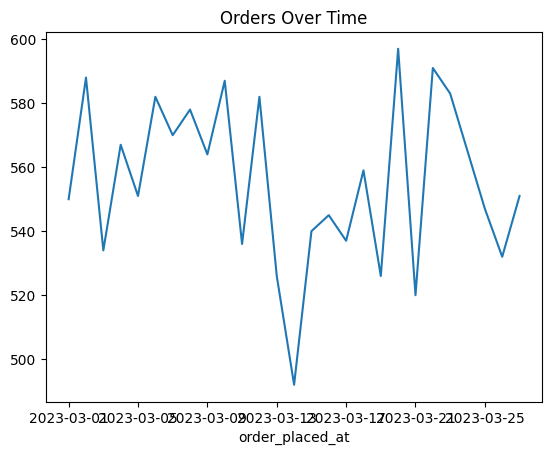

In [32]:
df1['order_placed_at'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Orders Over Time')
plt.show()

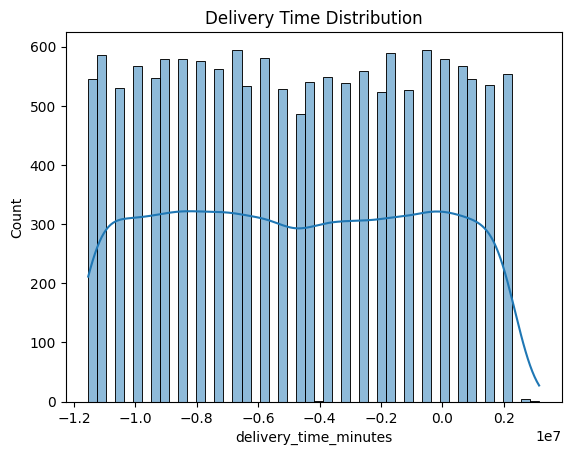

In [33]:
sns.histplot(df1['delivery_time_minutes'], bins=50, kde=True)
plt.title('Delivery Time Distribution')
plt.show()

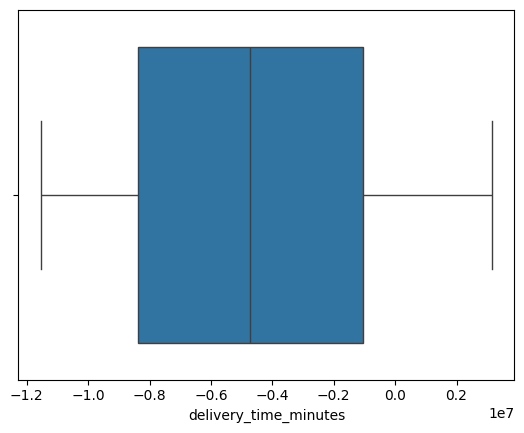

In [34]:
sns.boxplot(x=df1['delivery_time_minutes'])
plt.show()

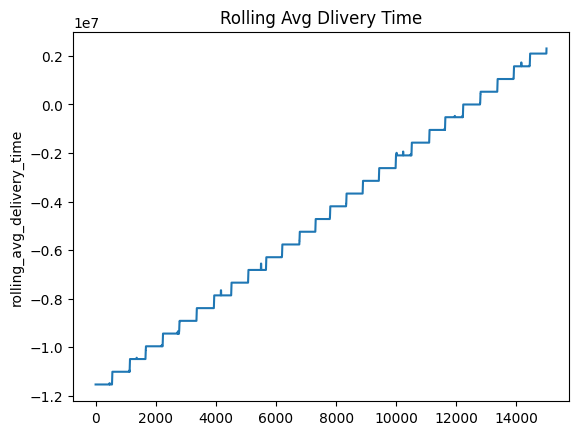

In [35]:
sns.lineplot(df1['rolling_avg_delivery_time'])
plt.title('Rolling Avg Dlivery Time')
plt.show()

In [36]:
binary_cols = [
    'is_delayed','same_day_delivery','is_weekend',
    'overnight_delivery','invalid_delivery','extreme_delay'
]

for col in binary_cols:
    print(col)
    print(df1[col].value_counts(normalize=True))
    print('-'*30)

is_delayed
is_delayed
False    0.8524
True     0.1476
Name: proportion, dtype: float64
------------------------------
same_day_delivery
same_day_delivery
False    0.9618
True     0.0382
Name: proportion, dtype: float64
------------------------------
is_weekend
is_weekend
False    0.706667
True     0.293333
Name: proportion, dtype: float64
------------------------------
overnight_delivery
overnight_delivery
False    0.8526
True     0.1474
Name: proportion, dtype: float64
------------------------------
invalid_delivery
invalid_delivery
True     0.8144
False    0.1856
Name: proportion, dtype: float64
------------------------------
extreme_delay
extreme_delay
False    0.99
True     0.01
Name: proportion, dtype: float64
------------------------------


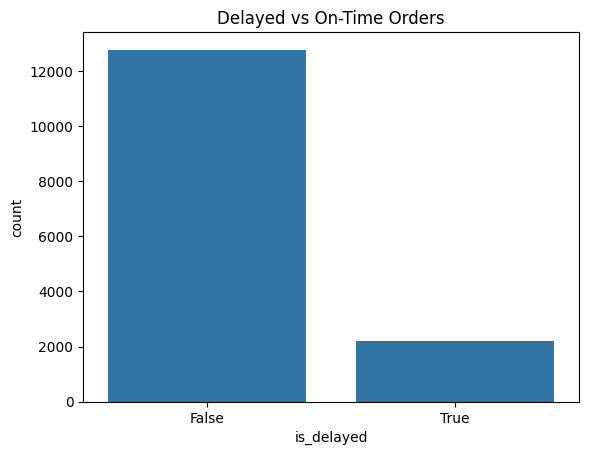

In [37]:
sns.countplot(x='is_delayed', data=df1)
plt.title('Delayed vs On-Time Orders')
plt.show()


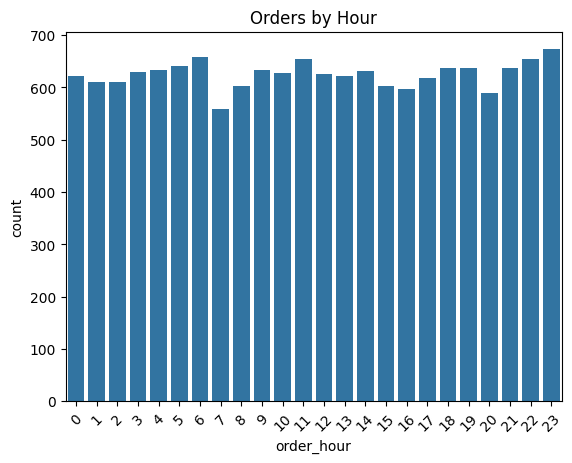

In [38]:
sns.countplot(x='order_hour', data=df1)
plt.xticks(rotation=45)
plt.title('Orders by Hour')
plt.show()


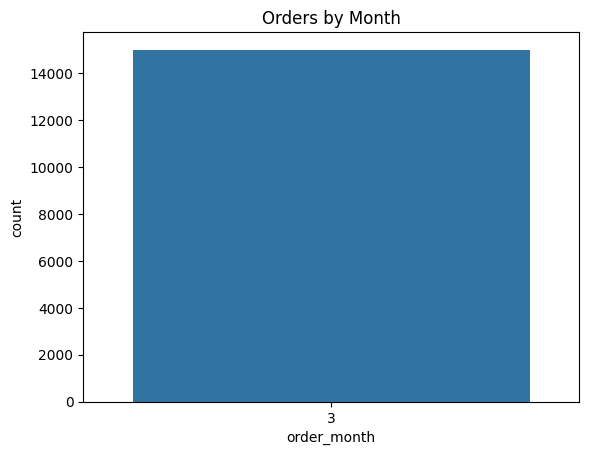

In [39]:
sns.countplot(x='order_month', data=df1)
plt.title('Orders by Month')
plt.show()


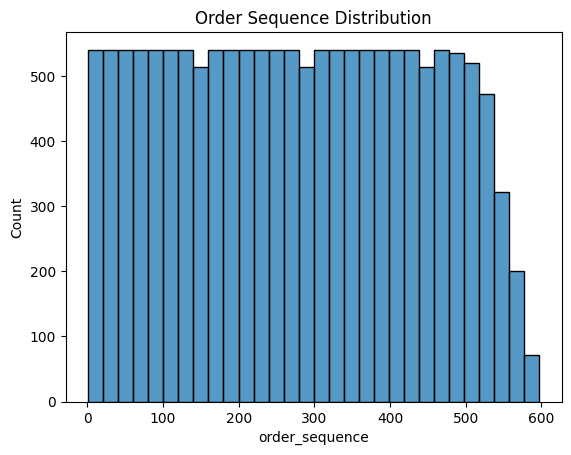

In [40]:
df1['order_sequence'].describe()
sns.histplot(df1['order_sequence'], bins=30)
plt.title('Order Sequence Distribution')
plt.show()


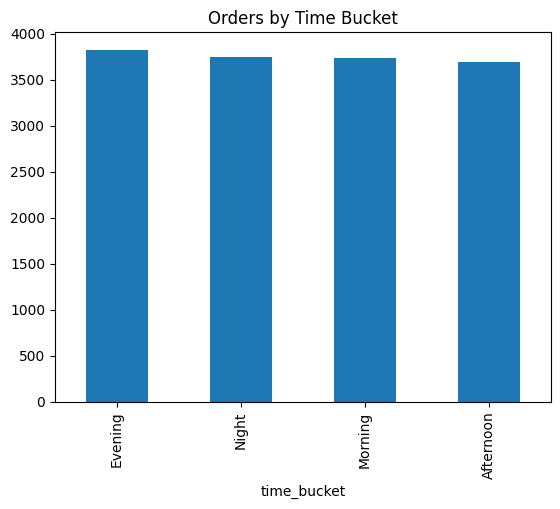

In [41]:
df1['time_bucket'].value_counts().plot(kind='bar')
plt.title('Orders by Time Bucket')
plt.show()


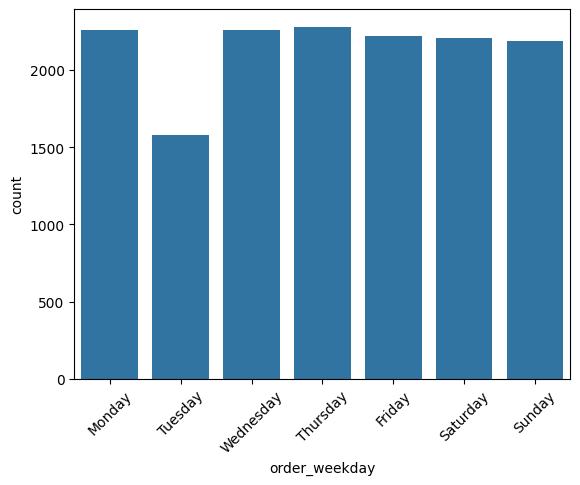

In [43]:
sns.countplot(
    x='order_weekday',
    data=df1,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.xticks(rotation=45)
plt.show()



#### Conclusion on Uni-Variate Analysis - 
    The univariate analysis helped understand the individual distribution and characteristics of key variables such as order dates, delivery times, and delay indicators. It revealed patterns like peak ordering periods, common delivery durations, and the proportion of delayed orders. These insights provided a strong foundation for deeper bivariate and multivariate analysis.

#### Performing Bi-Variate Analysis

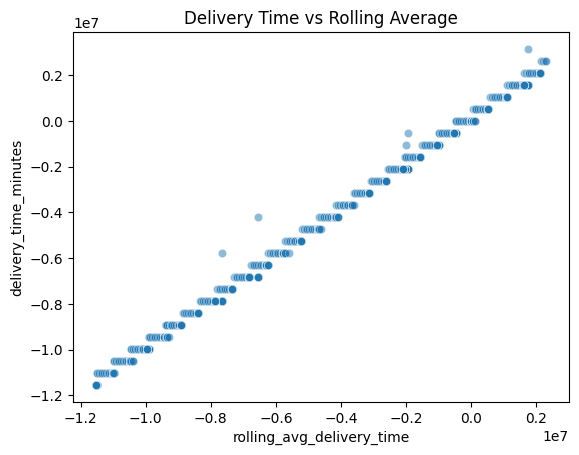

In [44]:
sns.scatterplot(
    x='rolling_avg_delivery_time',
    y='delivery_time_minutes',
    data=df1,
    alpha=0.5
)
plt.title('Delivery Time vs Rolling Average')
plt.show()

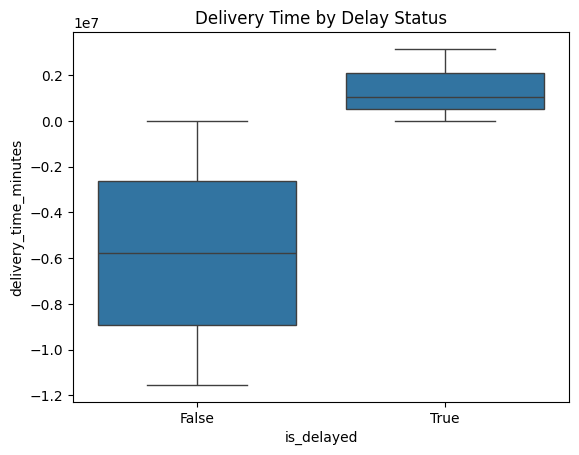

In [45]:
sns.boxplot(
    x='is_delayed',
    y='delivery_time_minutes',
    data=df1
)
plt.title('Delivery Time by Delay Status')
plt.show()

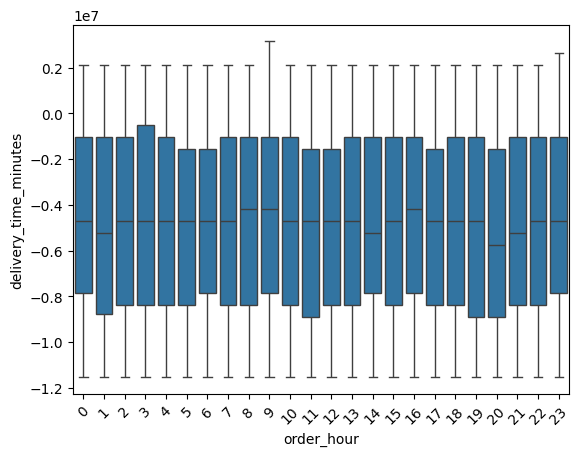

In [46]:
sns.boxplot(
    x='order_hour',
    y='delivery_time_minutes',
    data=df1
)
plt.xticks(rotation=45)
plt.show()

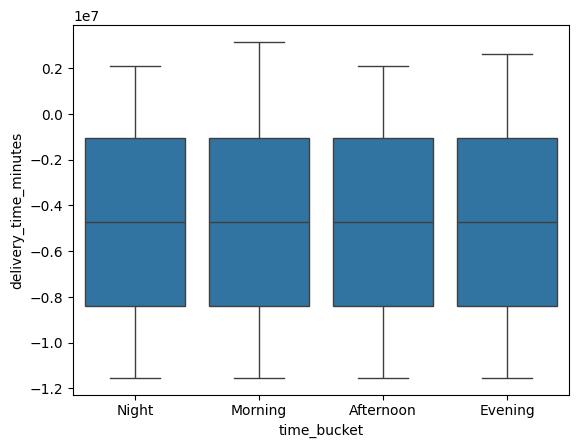

In [47]:
sns.boxplot(
    x='time_bucket',
    y='delivery_time_minutes',
    data=df1,
    order=['Night','Morning','Afternoon','Evening']
)
plt.show()

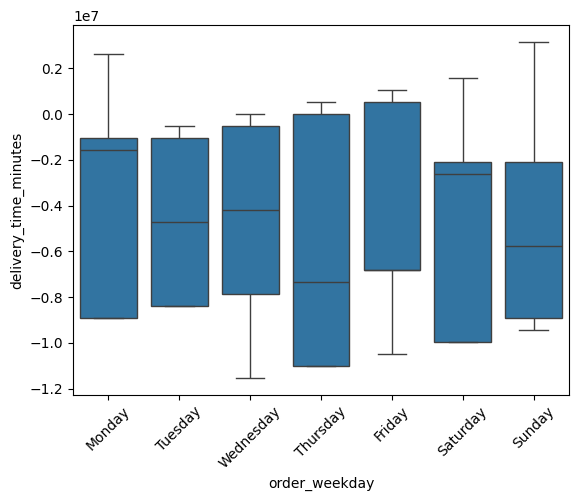

In [48]:
sns.boxplot(
    x='order_weekday',
    y='delivery_time_minutes',
    data=df1,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)
plt.xticks(rotation=45)
plt.show()

In [49]:
pd.crosstab(df1['time_bucket'], df1['is_delayed'], normalize='index')

is_delayed,False,True
time_bucket,,
Night,0.846154,0.153846
Morning,0.855728,0.144272
Afternoon,0.856524,0.143476
Evening,0.851281,0.148719


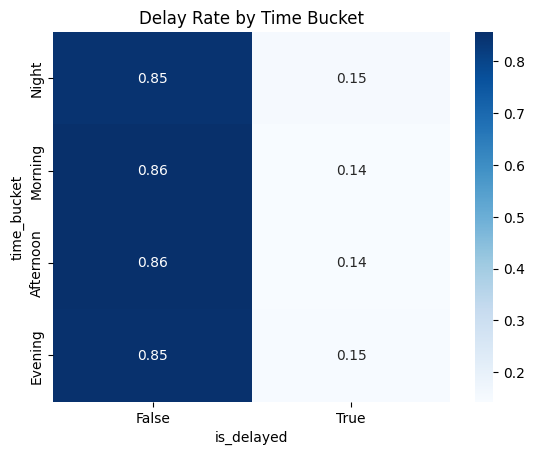

In [50]:
sns.heatmap(
    pd.crosstab(df1['time_bucket'], df1['is_delayed'], normalize='index'),
    annot=True,
    cmap='Blues'
)
plt.title('Delay Rate by Time Bucket')
plt.show()

In [51]:
pd.crosstab(df1['is_weekend'], df1['is_delayed'], normalize='index')

is_delayed,False,True
is_weekend,,
False,0.892925,0.107075
True,0.754773,0.245227


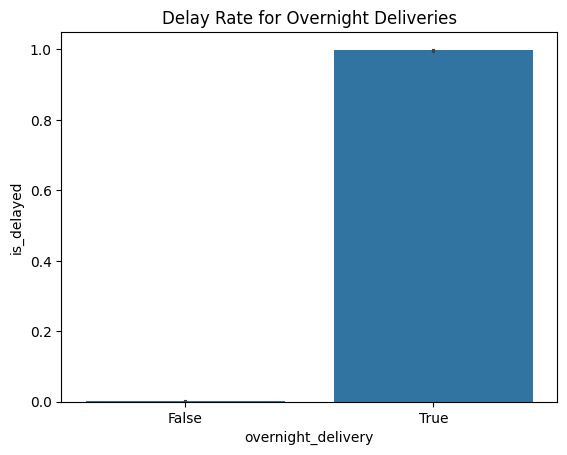

In [52]:
sns.barplot(
    x='overnight_delivery',
    y='is_delayed',
    data=df1
)
plt.title('Delay Rate for Overnight Deliveries')
plt.show()

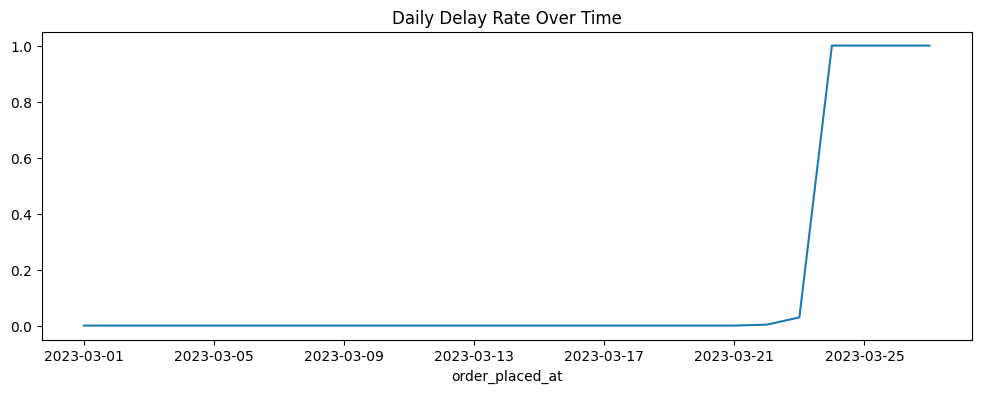

In [53]:
daily_delay_rate = df1.groupby(df1['order_placed_at'].dt.date)['is_delayed'].mean()

daily_delay_rate.plot(figsize=(12,4))
plt.title('Daily Delay Rate Over Time')
plt.show()

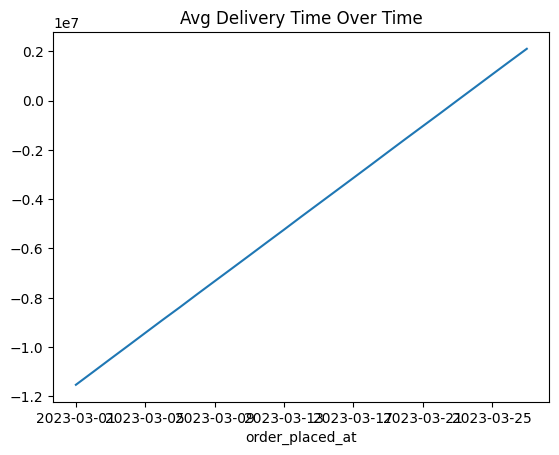

In [54]:
df1.groupby(df1['order_placed_at'].dt.date)['delivery_time_minutes'].mean().plot()
plt.title('Avg Delivery Time Over Time')
plt.show()

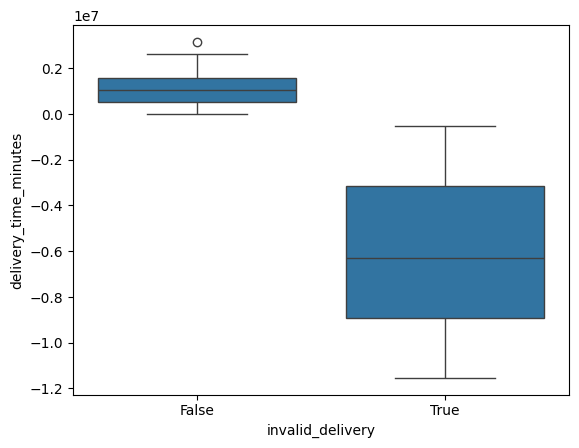

In [55]:
sns.boxplot(
    x='invalid_delivery',
    y='delivery_time_minutes',
    data=df1
)
plt.show()

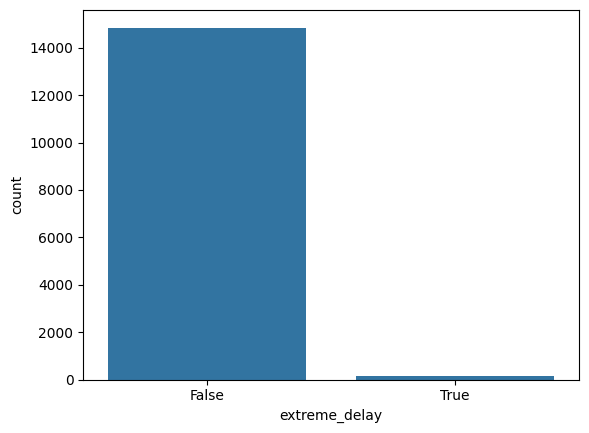

In [56]:
sns.countplot(x='extreme_delay', data=df1)
plt.show()

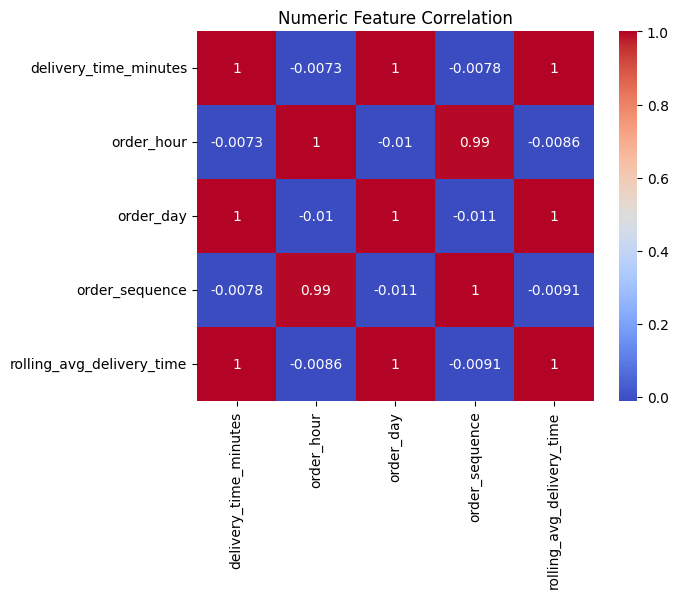

In [57]:
num_cols = [
    'delivery_time_minutes','order_hour','order_day',
    'order_sequence','rolling_avg_delivery_time'
]

sns.heatmap(df1[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlation')
plt.show()

#### Conclusion on Bi-Variate Analysis - 
    The bivariate analysis revealed meaningful relationships between delivery time and delay status, as well as variations across different days and months. Delayed orders were strongly associated with higher delivery times, and certain periods showed increased delay frequency. These findings highlight key factors influencing delivery performance and help identify areas for operational improvement.

### Conclusion -
    This exploratory data analysis provided a comprehensive understanding of order and delivery behavior by examining distributions, trends, and relationships across key variables. The analysis identified factors contributing to delivery delays, including delivery time and temporal patterns. These insights can support data-driven decisions to improve delivery efficiency and overall operational performance.